In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Trapezoid method

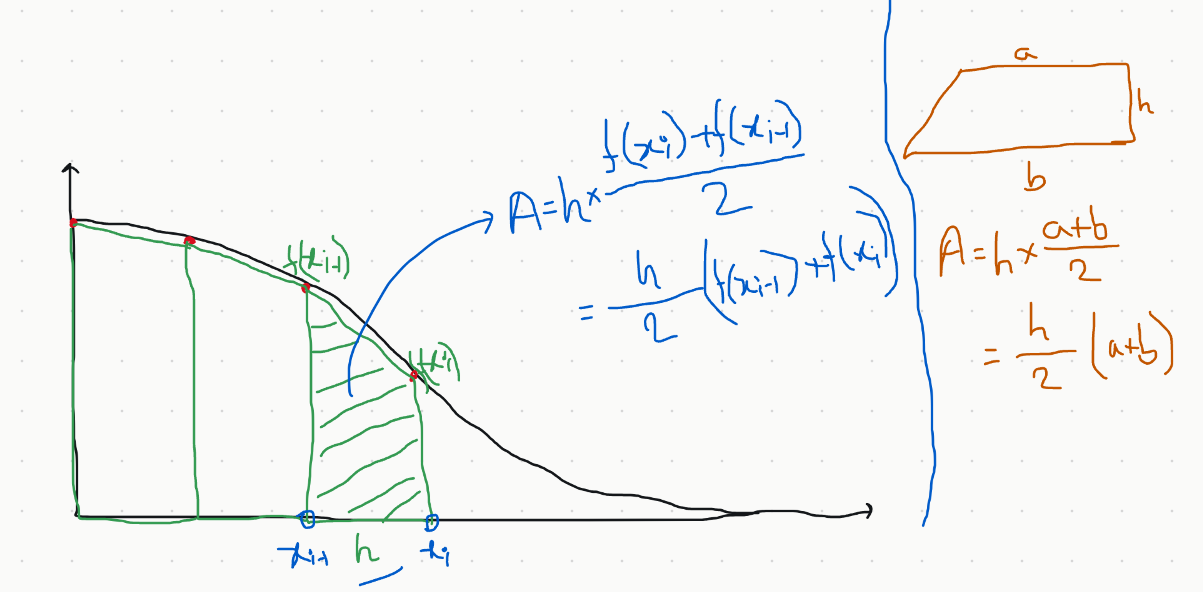

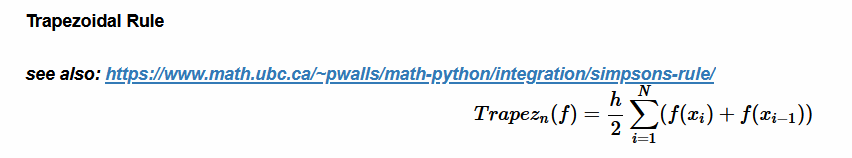

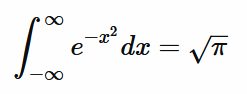

In [6]:
import numpy as np
from scipy.constants import pi


def f1(x):
    return x**3


def f2(x):
    return np.exp(-x**2)



def trapezoid(f,a,b,n=100): 
    # this func is for integrating f in the interval [a,b] with n sampling points

    x = np.linspace(a,b,n+1) # array of sampling points
    y = f(x) # corrsponding 
    w = (b - a)/n # exactly same as before
    
    return w/2 * np.sum(y[1:] + y[:-1]) # y[1:] = f(x_i), y[:-1] = f(x_i-1)



# y[1:]     # right endpoints
# y[:-1]    # left endpoints


print(trapezoid(f1,0,5,1000))
print(trapezoid(f2,-10,10)-np.sqrt(pi)) 

156.25015625
0.0


# Simpson rule

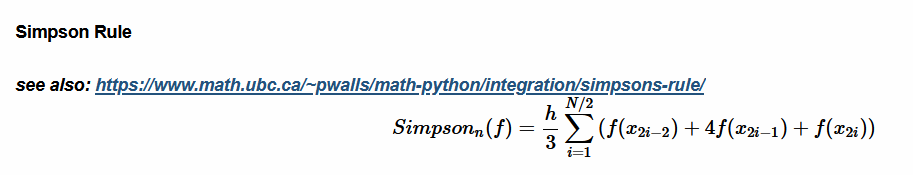

https://en.wikipedia.org/wiki/Simpson%27s_rule#/media/File:Simpson's_One-Third_Rule.gif

In [11]:
import numpy as np
from scipy.constants import pi

def f(x):
    return x**3

def f1(x):
    return np.exp(-x**2)


def simpson(f,a,b,n=100):

    if n % 2 == 1:
        raise ValueError("n must be even") # gives an error message and stops the function
    
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    y = f(x)
    
    return h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])



print(simpson(f,0,5,10))
print(simpson(f1,-10,10)-np.sqrt(pi))

156.25
-4.440892098500626e-16


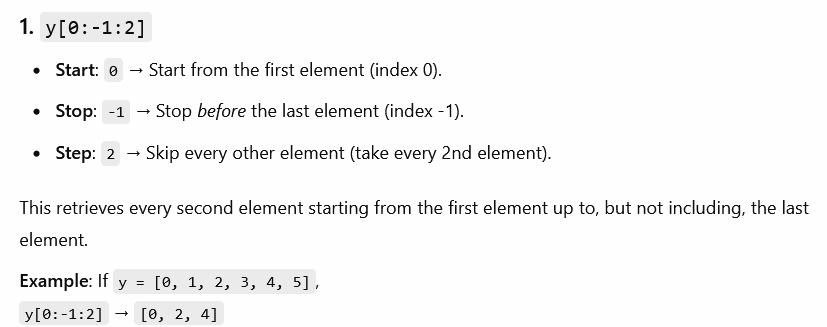

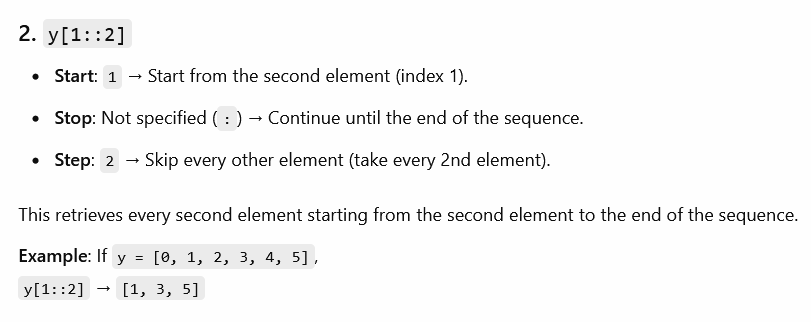

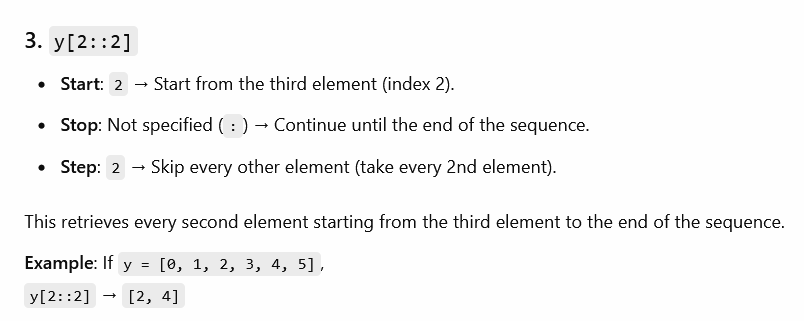

In [13]:
from scipy import integrate # new import, where the integrate bulti-in functions are defined
import numpy as np
from scipy.constants import pi

a = 0
b = 5

def f(x):
    return x**3

val, err = integrate.quad(f, a, b) # quad method

print("result = ",val,"\terror = ",err)

result =  156.25000000000003 	error =  1.7347234759768075e-12


In [15]:
val, err = integrate.quadrature(f, a, b)

print("result = ",val,"\terror = ",err)

result =  156.25 	error =  2.842170943040401e-14


/tmp/ipykernel_24/3022721607.py:1: DeprecationWarning: `scipy.integrate.quadrature` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  val, err = integrate.quadrature(f, a, b)


# Built-in Trapezoid and Simpson rule

In [21]:
x0 = 0
x1 = 5
x = np.linspace(a, b, 150)

val_trpz = integrate.trapezoid(f(x), x)
val_simps = integrate.simpson(f(x), x=x) # different syntax

print("result (trapezoid) = ",val_trpz)
print("result (simpson) = ",val_simps)

result (trapezoid) =  156.25703797126255
result (simpson) =  156.25000031701148


# Multiple or Double integral

In [ ]:
# from scipy import integrate
from scipy.integrate import dblquad
import numpy as np
from scipy.constants import pi
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(-x**2-y**2)

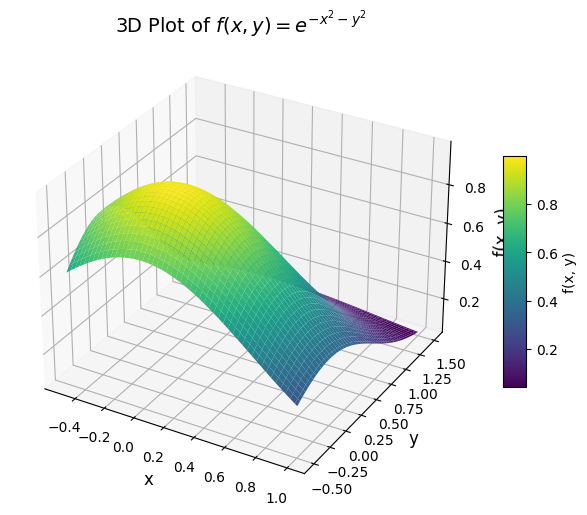

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return np.exp(-x**2 - y**2)

# Create a grid of x and y values
x = np.linspace(-0.5, 1, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and a color bar
ax.set_title("3D Plot of $f(x, y) = e^{-x^2 - y^2}$", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("f(x, y)", fontsize=12)
fig.colorbar(surf, shrink=0.5, aspect=10, label="f(x, y)")

plt.show()


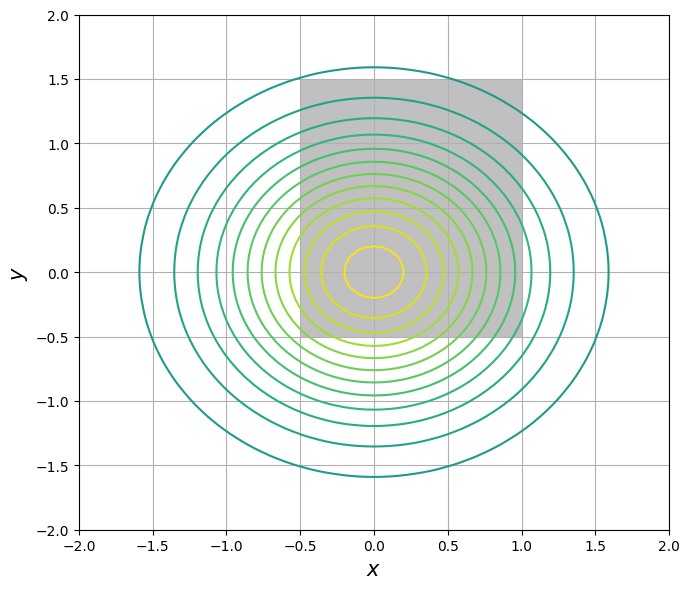

In [28]:
fig, ax = plt.subplots(figsize=(7, 6))

x = y = np.linspace(-2, 2, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, vmin=-1, vmax=1)

int_area = plt.Rectangle((-0.5, -0.5), 1.5, 2, facecolor="silver")
ax.add_patch(int_area)

#ax.axis('tight')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
ax.grid()
fig.tight_layout()

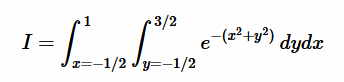

In [30]:
from scipy import integrate

# Define the function
def f(x, y):
    return np.exp(-x**2 - y**2)

val, err = integrate.nquad(f, [(-0.5, 1), (-0.5, 1.5)])

print("result = ",val,"\terror = ",err)

result =  1.5916415529575043 	error =  1.7670770990435616e-14


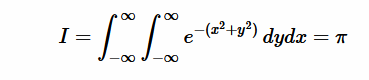

In [31]:
# Define the function
def f(x, y):
    return np.exp(-x**2 - y**2)

val, err = integrate.nquad(f, [(-np.inf, np.inf), (-np.inf, np.inf)])

print("result = ",val,"\terror = ",err)

result =  3.141592653589777 	error =  2.5173086737433208e-08


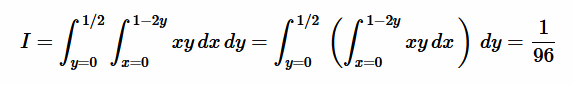

In [33]:
from scipy.integrate import dblquad

val, err = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda y: 1-2*y)

print("result = ", val, "\terror = ", err)

result =  0.010416666666666668 	error =  4.101620128472366e-16
